# Regresión logística para predicciones bancarias

In [3]:
import pandas as pd
import statsmodels as sm
import numpy as np


In [4]:
data = pd.read_csv("../datasets/bank/bank.csv", sep=";")
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [5]:
data["y"] = (data["y"] == "yes").astype(int)

In [6]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [7]:
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"]) #Si cumple la condición se cambia a "Basic". Si no, se queda como está
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])

data["education"] = np.where(data["education"]=="high.school", "High School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Profesional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])

data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unkown", data["education"])

In [8]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Profesional Course',
       'Unkown', 'Illiterate'], dtype=object)

In [9]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [10]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [11]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Profesional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unkown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


In [12]:
import matplotlib.pyplot as plt

Text(0,0.5,'Frecuencia de compra del producto')

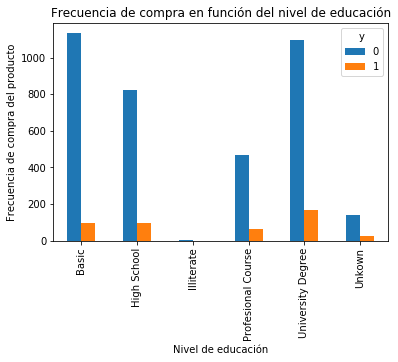

In [13]:
%matplotlib inline
pd.crosstab(data.education,data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

In [14]:
table = pd.crosstab(data["education"], data["y"])
table

y,0,1
education,,
Basic,1133,98
High School,824,97
Illiterate,1,0
Profesional Course,470,65
University Degree,1099,165
Unkown,141,26


Text(0,0.5,'Proporción de clientes')

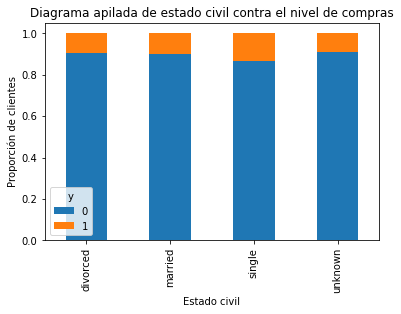

In [15]:
table = pd.crosstab(data["marital"],data["y"])
table.div(table.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilada de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

Text(0,0.5,'Frecuencia de compra del producto')

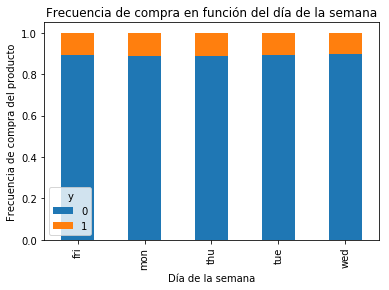

In [16]:
%matplotlib inline
table = pd.crosstab(data.day_of_week,data.y)
table.div(table.sum(1), axis=0).plot(kind="bar", stacked = True)
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra del producto")

Text(0,0.5,'Frecuencia de compra del producto')

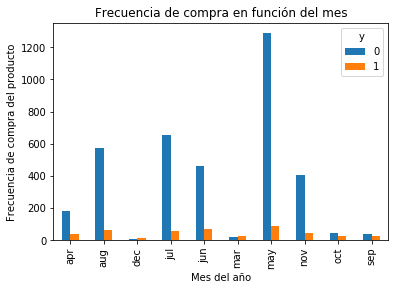

In [17]:
%matplotlib inline
pd.crosstab(data.month,data.y).plot(kind = "bar")
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0,0.5,'Cliente')

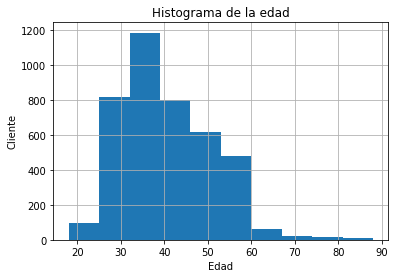

In [18]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de la edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")

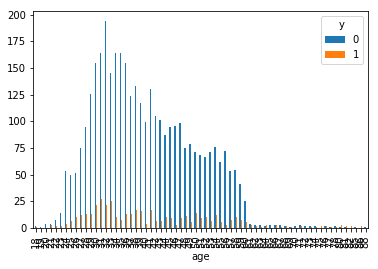

In [19]:
pd.crosstab(data.age, data.y).plot(kind="bar")

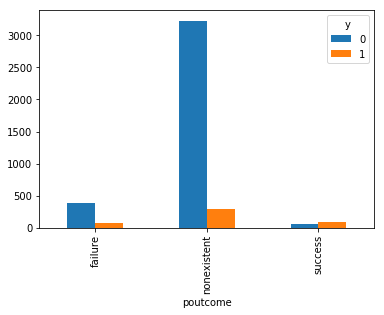

In [20]:
pd.crosstab(data.poutcome,data.y).plot(kind="bar")

### Conversión de las variables categóricas a dummies

In [21]:
categories = ["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]
for category in categories:
    cat_list = "cat" + "_" + category
    cat_dummies = pd.get_dummies(data[category], prefix = category)
    data = data.join(cat_dummies)

In [22]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,0,0,1,0,0,0,0,0,1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,...,0,0,1,0,0,0,0,0,1,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,...,0,0,0,0,0,0,1,0,1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,0,0,1,0,0,0,0,0,1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,...,0,0,0,1,0,0,0,0,1,0


In [23]:
data.shape

(4119, 72)

In [24]:
data_vars = data.columns.values.tolist()

In [25]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ["default"]]

In [26]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Profesional Course',
       'education_University Degree', 'education_Unkown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
 

In [27]:
bank_data_vars = bank_data.columns.values.tolist()
Y = bank_data["y"] #Variable a predecir
x = [v for v in bank_data_vars if v not in Y] #Variables predictoras
X = bank_data[x]

### Selección de rasgos para el modelo

In [28]:
n = 12

In [29]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
#Elegir, con un modelo logístico, las n variables que yo he decidido (12 en este caso)
rfe = RFE(lr,n)
rfe.fit(X,Y)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=12, step=1, verbose=0)

In [32]:
print(rfe.support_) #Indica las variables que se van a quedar en el modelo

[False False False False False False False False  True False  True False
 False False False  True False  True False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False  True  True False False
  True False  True  True  True False False False False False False  True
 False False]


In [33]:
print(rfe.ranking_) #Muestra el ranking de las mejores variables para el modelo

[48 47 17 50 13 28 15 30  1 42  1  3 23 16 43  1  7  1 24 31  8  9 45  2
 39 27 44 32  1 36 19 38 10 34 41 51  6  5 33 18 20 40 29 26  1  1 12  4
  1 14  1  1  1 25 46 37 49 35 21  1 22 11]


In [34]:
list(zip(bank_data_vars, rfe.support_)) #Vemos qué variables aparecen en el modelo

[('age', False),
 ('duration', False),
 ('campaign', False),
 ('pdays', False),
 ('previous', False),
 ('emp.var.rate', False),
 ('cons.price.idx', False),
 ('cons.conf.idx', False),
 ('euribor3m', True),
 ('nr.employed', False),
 ('y', True),
 ('job_admin.', False),
 ('job_blue-collar', False),
 ('job_entrepreneur', False),
 ('job_housemaid', False),
 ('job_management', True),
 ('job_retired', False),
 ('job_self-employed', True),
 ('job_services', False),
 ('job_student', False),
 ('job_technician', False),
 ('job_unemployed', False),
 ('job_unknown', False),
 ('marital_divorced', False),
 ('marital_married', False),
 ('marital_single', False),
 ('marital_unknown', False),
 ('education_Basic', False),
 ('education_High School', True),
 ('education_Illiterate', False),
 ('education_Profesional Course', False),
 ('education_University Degree', False),
 ('education_Unkown', False),
 ('default_no', False),
 ('default_unknown', False),
 ('default_yes', False),
 ('housing_no', False),
 ('h

In [35]:
cols = ["previous","euribor3m","job_blue-collar","job_retired","month_aug","month_dec","month_jul",
       "month_jun","month_mar","month_nov","day_of_week_wed","poutcome_nonexistent"]

In [36]:
X = bank_data[cols]
Y = bank_data["y"]

### Implementación del modelo en Python con statsmodels.api

In [37]:
import statsmodels.api as sm

In [38]:
logit_model = sm.Logit(Y,X) #Primero la variable a predecir

In [39]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [40]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4119
Model:                          Logit   Df Residuals:                     4107
Method:                           MLE   Df Model:                           11
Date:                Wed, 23 Jan 2019   Pseudo R-squ.:                  0.1554
Time:                        12:36:44   Log-Likelihood:                -1201.8
converged:                       True   LL-Null:                       -1422.9
                                        LLR p-value:                 6.449e-88
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                -0.1229      0.070     -1.755      0.079      -0.260       0.014
euribor3m               -0.6049      0.038    -15.788      0.000      -0.680      -0.530
job_blue-collar         -0.5032      0.152     -3.314      0.001      -0.801      -0.206
job_retired              0.2235      0.219      1.021      0.307      -0.206       0.653
month_aug                0.6048      0.176      3.437      0.001       0.260       0.950
month_dec                1.1358      0.449      2.528      0.011       0.255       2.016
month_jul                1.0327      0.191      5.407      0.000       0.658       1.407
month_jun                1.0775      0.175      6.149      0.000       0.734       1.421
month_mar                1.6448      0.314      5.241      0.000       1.030       2.260
month_nov                0.3828      0.195      1.963      0.050       0.001       0.765
day_of_week_wed         -0.0649      0.139     -0.466      0.641      -0.338       0.208
poutcome_nonexistent    -0.7753      0.122     -6.349      0.000      -1.015      -0.536
========================================================================================
"""

Las variables que tienes un P-valor (P>|z|) pequeño es porque son variables muy significativas para el modelo.
En este caso, todas menos "job_retired" y "day_of_week_wed"

### Implementación del modelo en Python con Scikit-Learn

In [41]:
from sklearn import linear_model

In [42]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
logit_model.score(X,Y)

0.8963340616654528

In [44]:
Y.mean()

0.10949259529011895

Esto es traduce en que un 10,9% de la gente compra

In [45]:
1-np.mean(Y)

0.8905074047098811

In [46]:
cols = [v for v in cols if (v not in "job_retired") & (v not in "poutcome_nonexistent")]

In [47]:
cols

['previous',
 'euribor3m',
 'job_blue-collar',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_nov',
 'day_of_week_wed']

In [48]:
X = data[cols]
Y = data["y"]
logit_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
logit_model.score(X,Y)

0.8973051711580481

Quitando las variables predictoras "job_retired" y "poutcome_nonexistent" mejoramos un poco el modelo predictivo

In [50]:
pd.DataFrame(list(zip(X.columns,np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.37027026812942376]
1,euribor3m,[-0.5409595240746193]
2,job_blue-collar,[-0.3856369389783986]
3,month_aug,[0.6507881387860727]
4,month_dec,[1.183294158618902]
5,month_jul,[0.9797221657324551]
6,month_jun,[1.078329909026212]
7,month_mar,[1.6533622407520647]
8,month_nov,[0.44073725692427257]
9,day_of_week_wed,[0.0394509266015564]


Los valores negativos desfavorecen las probabilidades de que la variable a predecir se produzca

## Validación del modelo logístico

In [51]:
from sklearn.cross_validation import train_test_split

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [53]:
lm = linear_model.LogisticRegression()
lm.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
from IPython.display import display,Math,Latex

In [55]:
display(Math(r'Y_p = \begin{cases} 0\ si\ p\leq0.5\\1\ si\ p>0.5 \end{cases}'))

<IPython.core.display.Math object>

In [56]:
lm.score(X_train,Y_train)

0.894901144640999

In [57]:
probs = lm.predict_proba(X_test)

In [58]:
probs

array([[0.95473894, 0.04526106],
       [0.84443776, 0.15556224],
       [0.93179681, 0.06820319],
       ...,
       [0.69032789, 0.30967211],
       [0.97413706, 0.02586294],
       [0.52667076, 0.47332924]])

In [59]:
prediction = lm.predict(X_test) #Las probabilidades (valor de la derecha de probs) < 0.5 aparecerán como valor 0

In [60]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
display(Math(r'\varepsilon\in (0,1), Y_p = \begin{cases} 0\ si\ p\leq\varepsilon\\1\ si\ p>\varepsilon \end{cases}'))

<IPython.core.display.Math object>

In [62]:
prob = probs[:,1] #Me quedo todas las filas, pero solo la segunda columna (índice 0)
prob_df = pd.DataFrame(prob)
threshold = 0.1 #Umbral
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.045261,0
1,0.155562,1
2,0.068203,0
3,0.062231,0
4,0.039960,0


In [63]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,846
1,390


In [64]:
390/(len(prob_df))*100

31.55339805825243

In [65]:
threshold = 0.15 #Umbral
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,910
1,326


In [66]:
326/(len(prob_df))*100

26.375404530744333

In [67]:
threshold = 0.05 #Umbral
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns = "count")

col_0,count
prediction,
0,507
1,729


In [68]:
729/(len(prob_df))*100

58.98058252427184

In [69]:
from sklearn import metrics

In [70]:
metrics.accuracy_score(Y_test, prediction)

0.9021035598705501

## Validación cruzada

In [71]:
from sklearn.cross_validation import cross_val_score

In [86]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=10)

In [79]:
scores

array([0.89922481, 0.89728682, 0.89728682, 0.90291262, 0.88910506,
       0.89299611, 0.90272374, 0.89494163])

In [80]:
scores.mean() #Promedio de las predicciones

0.8970597009920759

## Matrices de Confusión y curvas ROC

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [88]:
lm = linear_model.LogisticRegression()
lm.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
probs = lm.predict_proba(X_test)

In [90]:
probs

array([[0.95473894, 0.04526106],
       [0.84443776, 0.15556224],
       [0.93179681, 0.06820319],
       ...,
       [0.69032789, 0.30967211],
       [0.97413706, 0.02586294],
       [0.52667076, 0.47332924]])

In [96]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0] >= threshold, 1, 0)
prob_df["actual"] = list(Y_test) #Con el list pirde los identificadores antiguos
prob_df.head()

,0,prediction,actual
0,0.045261,0,0
1,0.155562,1,0
2,0.068203,0,0
3,0.062231,0,0
4,0.039960,0,0


In [98]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)

In [120]:
TN = confusion_matrix[0][0] #True negative
TP = confusion_matrix[1][1] #True positive
FP = confusion_matrix[0][1] #False negative
FN = confusion_matrix[1][0] #False positive

In [121]:
sens = TP/(TP+FN)
sens

0.4180327868852459

In [122]:
espc_1 = 1-TN/(TN+FP)
espc_1

0.07271095152603235

Según aumenta el umbral (threshold), tanto la sentibilidad como la especifidad decreden (Por eso la curva va del 1 al 0)

In [137]:
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensitivities = [1]
especifities_1 = [1]

for t in thresholds:
    prob_df["prediction"] = np.where(prob_df[0] >= t, 1, 0)
    prob_df["actual"] = list(Y_test) #Con el list pirde los identificadores antiguos
    prob_df.head()

    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN = confusion_matrix[0][0] #True negative
    TP = confusion_matrix[1][1] #True positive
    FP = confusion_matrix[0][1] #False negative
    FN = confusion_matrix[1][0] #False positive

    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)

sensitivities.append(0)
especifities_1.append(0)

In [124]:
sensitivities

[0.9344262295081968,
 0.8278688524590164,
 0.680327868852459,
 0.6721311475409836,
 0.6557377049180327,
 0.639344262295082,
 0.5081967213114754,
 0.48360655737704916,
 0.4180327868852459]

In [125]:
especifities_1

[0.770197486535009,
 0.5637342908438061,
 0.2908438061041293,
 0.2764811490125674,
 0.2342908438061041,
 0.22262118491921,
 0.12298025134649915,
 0.11490125673249552,
 0.07271095152603235]

In [117]:
import matplotlib.pyplot as plt

Text(0.5,1,'Curva ROC')

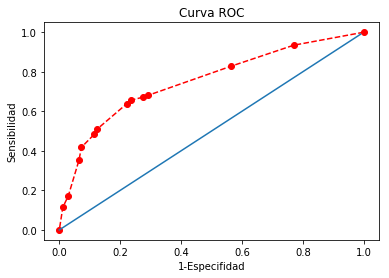

In [149]:
%matplotlib inline
plt.plot(especifities_1, sensitivities, marker="o", linestyle="--", color="r")
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

In [163]:
from sklearn import metrics
from ggplot import *

In [165]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

In [166]:
sensit

array([0.00819672, 0.02459016, 0.03278689, 0.03278689, 0.04098361,
       0.04098361, 0.05737705, 0.05737705, 0.07377049, 0.07377049,
       0.08196721, 0.08196721, 0.09016393, 0.09016393, 0.1147541 ,
       0.1147541 , 0.13114754, 0.13114754, 0.13934426, 0.13934426,
       0.13934426, 0.13934426, 0.14754098, 0.14754098, 0.14754098,
       0.1557377 , 0.1557377 , 0.1557377 , 0.17213115, 0.17213115,
       0.18852459, 0.18852459, 0.19672131, 0.19672131, 0.20491803,
       0.20491803, 0.23770492, 0.23770492, 0.24590164, 0.27868852,
       0.28688525, 0.28688525, 0.31147541, 0.31967213, 0.31967213,
       0.33606557, 0.33606557, 0.33606557, 0.33606557, 0.33606557,
       0.3442623 , 0.3442623 , 0.3442623 , 0.35245902, 0.35245902,
       0.36885246, 0.37704918, 0.37704918, 0.3852459 , 0.3852459 ,
       0.39344262, 0.40163934, 0.40983607, 0.40983607, 0.42622951,
       0.42622951, 0.43442623, 0.43442623, 0.43442623, 0.44262295,
       0.44262295, 0.44262295, 0.44262295, 0.44262295, 0.45081

In [180]:
df = pd.DataFrame({
    "esp": espc_1,
    "sens": sensit
})

In [169]:
df.head()

,x,y
0,0.000000,0.008197
1,0.000000,0.024590
2,0.000000,0.032787
3,0.001795,0.032787
4,0.001795,0.040984


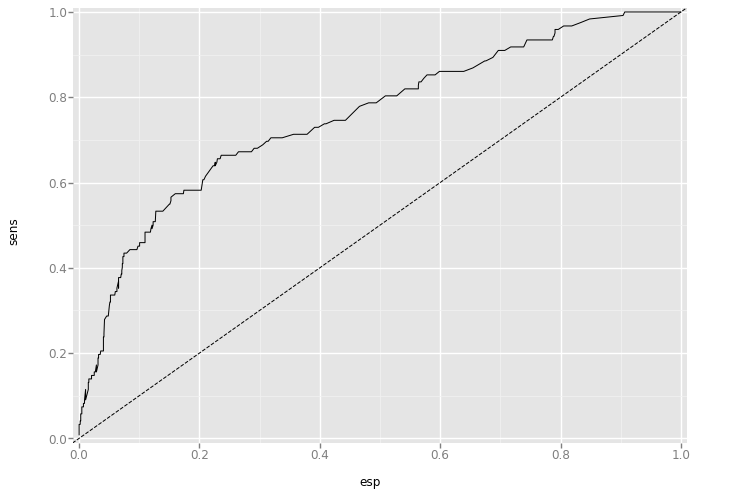

<ggplot: (-9223372029842613139)>

In [181]:
ggplot(df, aes(x="esp", y="sens")) + geom_line() + geom_abline(linetype="dashed") + xlim(-0.01,1.01) + ylim(-0.01,1.01)

In [172]:
auc = metrics.auc(espc_1,sensit) #Arear under curve
auc

0.7555773022927273

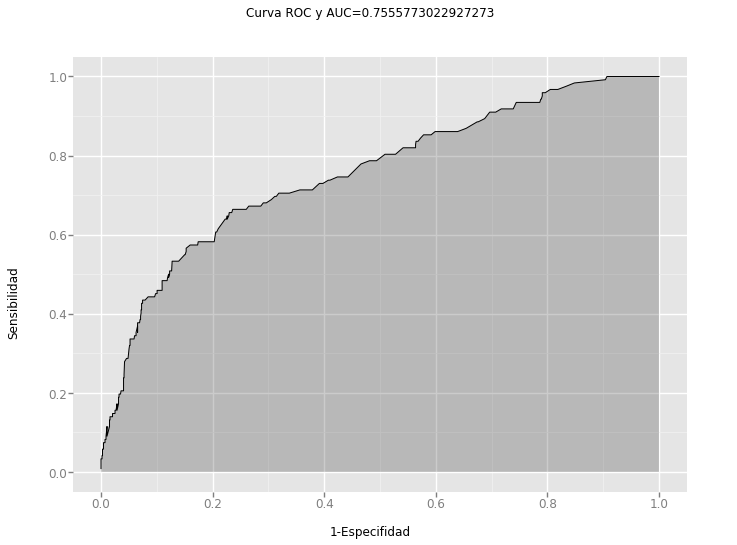

<ggplot: (7012189581)>

In [184]:
ggplot(df,aes(x="esp",y="sens")) + geom_area(alpha=0.25) + geom_line(aes(y="sens")) + ggtitle("Curva ROC y AUC={}".format(auc)) + xlab("1-Especifidad") + ylab("Sensibilidad")